In [107]:
import gzip
from collections import defaultdict
from surprise import SVD, Reader, Dataset
from surprise.model_selection import train_test_split
import pandas as pd
import math
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from surprise import BaselineOnly
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import json
import json
from matplotlib import pyplot as plt
import sklearn
import numpy as np
import random
import gzip
import math
import pandas as pd 
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from surprise import BaselineOnly
from surprise import accuracy

LOADING DATASET

In [10]:
def readJSON(path):
    f = gzip.open(path, 'rt', encoding='UTF-8')
    f.readline()
    for l in f:
        d = json.loads(l)
        yield d

In [11]:
allMod = []
for l in readJSON("modcloth_final_data.json.gz"):
    allMod.append(l)

In [12]:
allRent = []
for l in readJSON("renttherunway_final_data.json.gz"):
    allRent.append(l)

In [13]:
allMod[0]

{'item_id': '123373',
 'waist': '31',
 'size': 13,
 'quality': 3,
 'cup size': 'b',
 'hips': '30',
 'bra size': '36',
 'category': 'new',
 'length': 'just right',
 'height': '5ft 2in',
 'user_name': 'sydneybraden2001',
 'fit': 'small',
 'user_id': '587883'}

In [ ]:
allRent[0]

DATA ANALYSIS

In [15]:

rtr_data = pd.read_json('modcloth_final_data.json', lines=True)
rtr_data.head()

,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [16]:
rtr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82790 entries, 0 to 82789
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   item_id         82790 non-null  int64  
 1   waist           2882 non-null   float64
 2   size            82790 non-null  int64  
 3   quality         82722 non-null  float64
 4   cup size        76535 non-null  object 
 5   hips            56064 non-null  float64
 6   bra size        76772 non-null  float64
 7   category        82790 non-null  object 
 8   bust            11854 non-null  object 
 9   height          81683 non-null  object 
 10  user_name       82790 non-null  object 
 11  length          82755 non-null  object 
 12  fit             82790 non-null  object 
 13  user_id         82790 non-null  int64  
 14  shoe size       27915 non-null  float64
 15  shoe width      18607 non-null  object 
 16  review_summary  76065 non-null  object 
 17  review_text     76065 non-null 

In [17]:
missing_data_sum = rtr_data.isnull().sum()
print(missing_data_sum,"\n")
missing_data = pd.DataFrame({'total_missing_values': missing_data_sum,'percentage_of_missing_values': (missing_data_sum/rtr_data.shape[0])*100})
print(missing_data)

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64 

                total_missing_values  percentage_of_missing_values
item_id                            0                      0.000000
waist                          79908                     96.518903
size                               0                      0.000000
quality                           68                      0.082136
cup size                        6255                      7.555260
hips                           26726                     32.281677
bra size                        6018                      7.268994
category         

In [20]:
def countplot(independent_features):
  plt.figure(figsize=(25, 25))
  for loc, feature in enumerate(independent_features):
    ax = plt.subplot(3, 4, loc+1)
    ax.set_xlabel('{}'.format(feature), fontsize=10)
    chart = sns.countplot(rtr_data[feature])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  return None

C:\Users\shiva\AppData\Local\Temp\ipykernel_25900\3722173843.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
C:\Users\shiva\AppData\Local\Temp\ipykernel_25900\3722173843.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
C:\Users\shiva\AppData\Local\Temp\ipykernel_25900\3722173843.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
C:\Users\shiva\AppData\Local\Temp\ipykernel_25900\3722173843.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


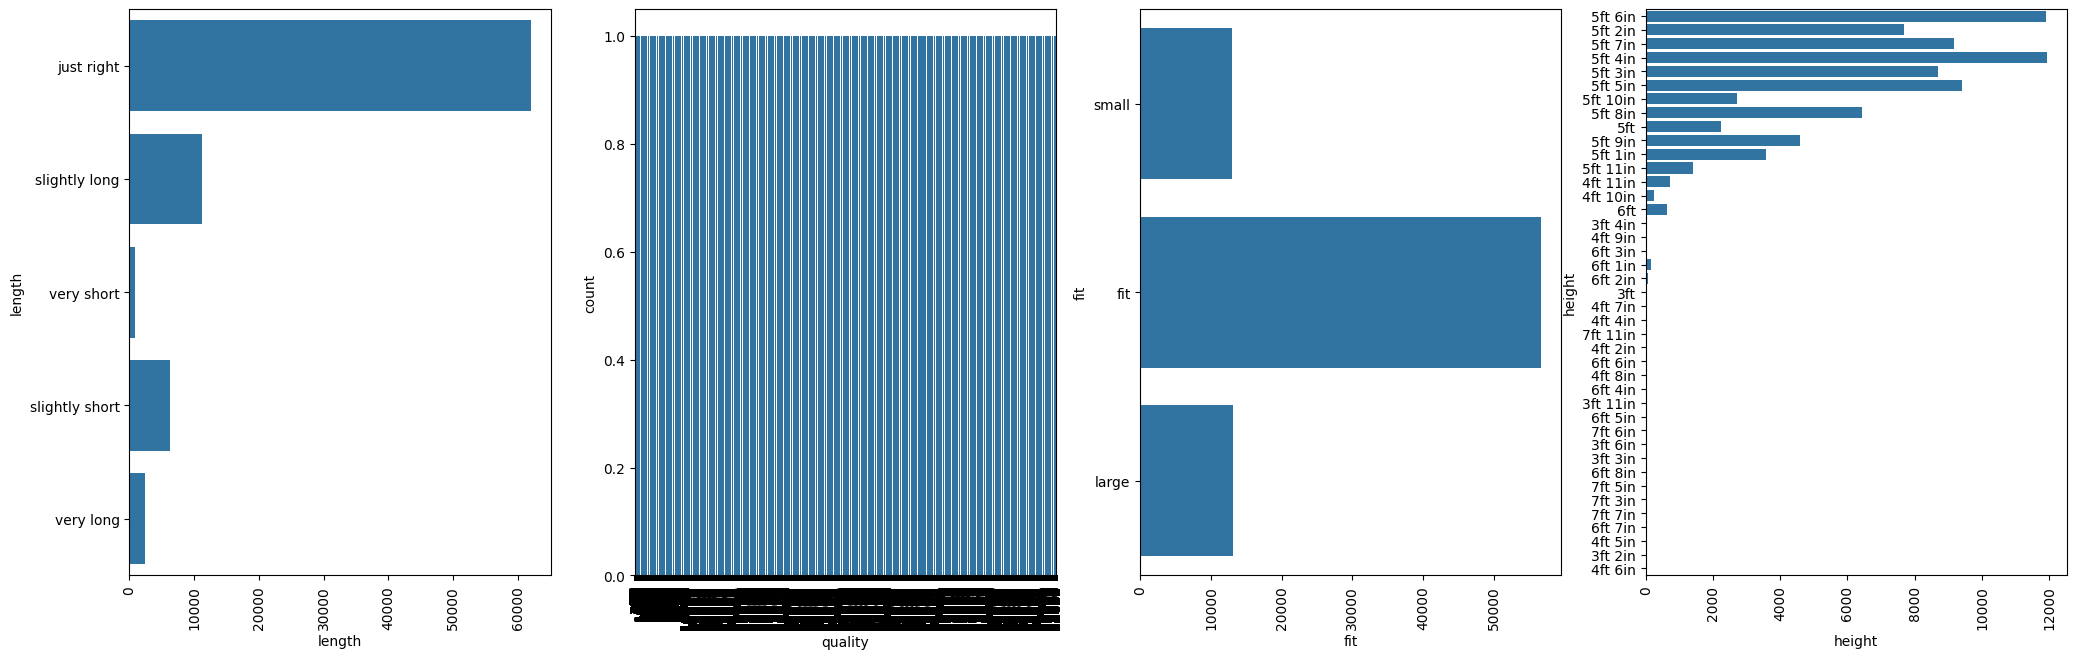

In [22]:
uniques_data = ['length','quality','fit','height']
countplot(uniques_data)

DATA PREPROCESSING

In [90]:
# item_id               0
# waist             79908
# size                  0
# quality              68
# cup size           6255
# hips              26726
# bra size           6018
# category              0
# bust              70936
# height             1107
# user_name             0
# length               35
# fit                   0
# user_id               0
# shoe size         54875
# shoe width        64183
# review_summary     6725
# review_text        6725
df = rtr_data.drop(columns=['cup size','review_summary','review_text','length','user_name','fit','category','item_id','user_id','hips','shoe size','shoe width'])

In [91]:
def height_in_cms(ht):
  if ht.lower() != 'nan':
    ht = ht.replace('ft','').replace('in', '') #'5\' 8"'
    h_ft = int(ht.split()[0])
    if len(ht.split()) > 1:
      h_inch = int(ht.split()[1])
    else:
      h_inch = 0
    h_inch += h_ft * 12
    h_cm = int(h_inch * 2.54)
    return h_cm

In [92]:
df.height = df.height.astype(str).apply(height_in_cms)

In [93]:
df.head()

,waist,size,quality,bra size,bust,height
0,29.0,7,5.0,34.0,36,167.0
1,31.0,13,3.0,36.0,NaN,157.0
2,30.0,7,2.0,32.0,NaN,170.0
3,NaN,21,5.0,NaN,NaN,NaN
4,NaN,18,5.0,36.0,NaN,157.0


In [94]:
df.height.fillna(value=df.height.mean(), inplace=True)
df.height.isnull().sum()

0

In [95]:
df.quality.fillna(value=df.quality.mean(), inplace=True)
df.quality.isnull().sum()

0

In [97]:
df['bust'] = pd.to_numeric(df['bust'], errors='coerce')
df.bust.fillna(value=df.bust.mean(), inplace=True)
df.bust.isnull().sum()

0

In [98]:
df.waist.fillna(value=df.waist.mean(), inplace=True)
df.waist.isnull().sum()

0

In [99]:
df["bra size"].fillna(value=df["bra size"].mean(), inplace=True)
df["bra size"].isnull().sum()

0

In [100]:
df.head()

,waist,size,quality,bra size,bust,height
0,29.000000,7,5.0,34.000000,36.000000,167.000000
1,31.000000,13,3.0,36.000000,37.499199,157.000000
2,30.000000,7,2.0,32.000000,37.499199,170.000000
3,31.319223,21,5.0,35.972125,37.499199,165.044207
4,31.319223,18,5.0,36.000000,37.499199,157.000000


In [ ]:
# df["cup size"].fillna(value=df["cup size"].mean(), inplace=True)
# df["cup size"].isnull().sum()

In [80]:
def qualitystr(r):
    global r1
    if r != 'NaN':
        r1=int(r)
    return r1

df.quality = df.quality.astype(int).apply(qualitystr)

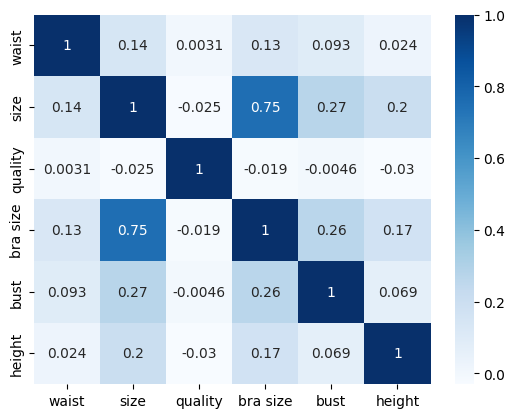

In [101]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

Trying Classification Models

In [102]:
X = df.loc[:,['bust','height','bra size','waist']]
y= df.loc[:,['size']]

In [103]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20, random_state=27)

In [110]:
LogReg = sklearn.linear_model.LogisticRegression ()
LogReg.fit(X_train,y_train)
LogReg_prediction = LogReg.predict(X_test)
print("ACCURACY",accuracy_score(LogReg_prediction, y_test))


c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ACCURACY 0.3312598139871965


c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
print("ACCURACY",accuracy_score(KNN_prediction, y_test))

c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


ACCURACY 0.31664452228530016


In [113]:
DTC_model = DecisionTreeClassifier()
DTC_model.fit(X_train, y_train)
DTC_prediction = DTC_model.predict(X_test)
print("ACCURACY",accuracy_score(DTC_prediction, y_test))

ACCURACY 0.3742601763498007


In [114]:
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test)
print("ACCURACY",accuracy_score(SVC_prediction, y_test))

c:\Users\shiva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ACCURACY 0.3565044087450175


Trying Regression Models

In [115]:
X = df.loc[:,['bust','height','bra size','waist']]
bu=df['bust'].values.tolist()
hi=df['height'].values.tolist()
si=df['size'].values.tolist()
br = df['bra size'].values.tolist()
w = df['waist'].values.tolist()
max_value = np.max(si)
min_value = np.min(si)
print(max_value)
print(min_value)
print(len(hi))
print(len(si))
print(len(bu))
print(len(w))

38
0
82790
82790
82790
82790


In [116]:
def feature1(i):
    feat = [1] # Constant feature
    feat.append(bu[i]) # bust
    feat.append(hi[i]) # heigth
    feat.append(w[i]) # waist
    feat.append(br[i]) # bra size
    return feat

######## Linear Regression

X = np.asarray([feature1(i) for i in range(82790)])
y = np.asarray(si).T


In [118]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20)

In [117]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [119]:
LinReg = sklearn.linear_model.LinearRegression(fit_intercept=False)
LinReg.fit(X, y)
y_pred = LinReg.predict(X)
print(MSE(y, y_pred))

28.723960386133733


Trying out model: ALS, SVD with ITEM_ID, USER_ID, QUALITY

In [37]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rtr_data[['user_id', 'item_id', 'quality']], reader)

In [38]:
trainset, testset = train_test_split(data,test_size=0.2)

In [26]:
from surprise import BaselineOnly
from surprise.model_selection import GridSearchCV
param_grid = {
    'bsl_options': {
        'method': ['als','sgd'],
        'reg_i': [1, 0.1,0.01, 10, 100],  # Regularization parameter for items (ALS)
        'reg_u': [1, 0.1,0.01, 10, 100],  # Regularization parameter for users (ALS)
        'reg':[1,10,0.1,0.01]
    }
}

gs = GridSearchCV(BaselineOnly, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

# Best score and parameters
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

<bound method Trainset.all_ratings of <surprise.trainset.Trainset object at 0x0000027A6B0AE710>>

In [42]:
from surprise import BaselineOnly
from surprise import accuracy

#bsl_options = {'method': 'als', 'reg_i': 1.15, 'reg_u': 9.95, 'n_epochs':5}
bsl_options = {'method': 'als', 'reg_i': 1, 'reg_u': 1, 'n_epochs':10}
algo = BaselineOnly(bsl_options=bsl_options)


algo.fit(trainset)
predictions = algo.test(testset)
#predictions
# Compute and print the Mean Squared Error
best_mse = accuracy.mse(predictions, verbose=True)

Estimating biases using als...
MSE: nan
